<a href="https://colab.research.google.com/github/BachokunIAR/Battery/blob/main/battery_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color =red> Battery Data Analysis

#<font color =green> Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os, chardet, glob
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

#<font color = green> Loading the dataset into colab

In [2]:
file = files.upload()

Saving CS2_3_1_30_12.csv to CS2_3_1_30_12.csv


In [3]:
!ls

CS2_3_1_30_12.csv  sample_data


In [4]:
data = pd.read_csv("CS2_3_1_30_12.csv")
pd.set_option('display.max_columns', None)
data.head()

,Data_Point,Test_Time_s,Date_Time,Step_Time_sec,Step_Index,Cycle_Index,Current_A,Voltage_V,Charge_Capacity_Ah,Discharge_Capacity_Ah,Charge_Energy_Wh,Discharge_Energy(Wh),dV_dt_V_s,Internal_Resistance_Ohm,Is_FC_Data,AC_Impedance_Ohm,ACI_Phase_Angle(Deg)
0,1,30.000526,1/12/2012 15:54,30.000526,1,1,0.000000,3.840590,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.0,0,0,0
1,2,30.001003,1/12/2012 15:54,0.000003,2,1,0.549575,3.900974,3.920000e-10,0.0,1.530000e-09,0.0,0.000000,0.0,0,0,0
2,3,33.391639,1/12/2012 15:54,3.390638,2,1,0.549936,3.911011,5.177720e-04,0.0,2.023683e-03,0.0,0.002007,0.0,0,0,0
3,4,43.407160,1/12/2012 15:54,13.406159,2,1,0.549575,3.919591,2.047238e-03,0.0,8.012342e-03,0.0,0.000615,0.0,0,0,0
4,5,53.422616,1/12/2012 15:54,23.421615,2,1,0.549755,3.925742,3.576707e-03,0.0,1.401228e-02,0.0,0.000453,0.0,0,0,0


In [5]:
data.describe()

,Data_Point,Test_Time_s,Step_Time_sec,Step_Index,Cycle_Index,Current_A,Voltage_V,Charge_Capacity_Ah,Discharge_Capacity_Ah,Charge_Energy_Wh,Discharge_Energy(Wh),dV_dt_V_s,Internal_Resistance_Ohm,Is_FC_Data,AC_Impedance_Ohm,ACI_Phase_Angle(Deg)
count,63990.0000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.0,63990.0,63990.0
mean,31995.5000,325393.609669,8027.674623,12.095577,3.392749,0.002504,3.886764,14.903559,14.900420,59.747854,55.109285,0.000022,0.063263,0.0,0.0,0.0
std,18472.4662,188149.873798,9023.749831,7.190006,1.662960,0.470449,0.233353,9.023678,9.044861,36.184474,33.311061,0.000853,0.032991,0.0,0.0,0.0
min,1.0000,30.000526,0.000003,1.000000,1.000000,-2.199840,2.699620,0.000000,0.000000,0.000000,0.000000,-0.013275,0.000000,0.0,0.0,0.0
25%,15998.2500,161982.513450,1562.196849,6.000000,2.000000,-0.219821,3.742488,7.060765,6.581911,28.309513,24.412401,-0.000032,0.041800,0.0,0.0,0.0
50%,31995.5000,325333.593000,3935.671162,11.000000,3.000000,-0.110191,3.900650,15.177718,15.106644,60.746185,55.958848,0.000000,0.083524,0.0,0.0,0.0
75%,47992.7500,488566.323775,12367.937760,16.000000,5.000000,0.549755,4.065773,22.314259,22.789562,89.464904,84.218248,0.000032,0.083524,0.0,0.0,0.0
max,63990.0000,650972.952400,34620.347170,31.000000,6.000000,0.550297,4.203215,30.172554,30.462197,120.949066,112.431401,0.034805,0.104501,0.0,0.0,0.0


In [6]:
data.shape

(63990, 17)

#<font color =red> Checking the Columns in the Dataset

In [7]:
data.columns

Index(['Data_Point', 'Test_Time_s', 'Date_Time', 'Step_Time_sec', 'Step_Index',
       'Cycle_Index', 'Current_A', 'Voltage_V', 'Charge_Capacity_Ah',
       'Discharge_Capacity_Ah', 'Charge_Energy_Wh', 'Discharge_Energy(Wh)',
       'dV_dt_V_s', 'Internal_Resistance_Ohm', 'Is_FC_Data',
       'AC_Impedance_Ohm', 'ACI_Phase_Angle(Deg)'],
      dtype='object')

In [8]:
len(data.columns)

17

# <font color = red> Information about the Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63990 entries, 0 to 63989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data_Point               63990 non-null  int64  
 1   Test_Time_s              63990 non-null  float64
 2   Date_Time                63990 non-null  object 
 3   Step_Time_sec            63990 non-null  float64
 4   Step_Index               63990 non-null  int64  
 5   Cycle_Index              63990 non-null  int64  
 6   Current_A                63990 non-null  float64
 7   Voltage_V                63990 non-null  float64
 8   Charge_Capacity_Ah       63990 non-null  float64
 9   Discharge_Capacity_Ah    63990 non-null  float64
 10  Charge_Energy_Wh         63990 non-null  float64
 11  Discharge_Energy(Wh)     63990 non-null  float64
 12  dV_dt_V_s                63990 non-null  float64
 13  Internal_Resistance_Ohm  63990 non-null  float64
 14  Is_FC_Data            

In [10]:
data.isna().sum()

Data_Point                 0
Test_Time_s                0
Date_Time                  0
Step_Time_sec              0
Step_Index                 0
Cycle_Index                0
Current_A                  0
Voltage_V                  0
Charge_Capacity_Ah         0
Discharge_Capacity_Ah      0
Charge_Energy_Wh           0
Discharge_Energy(Wh)       0
dV_dt_V_s                  0
Internal_Resistance_Ohm    0
Is_FC_Data                 0
AC_Impedance_Ohm           0
ACI_Phase_Angle(Deg)       0
dtype: int64

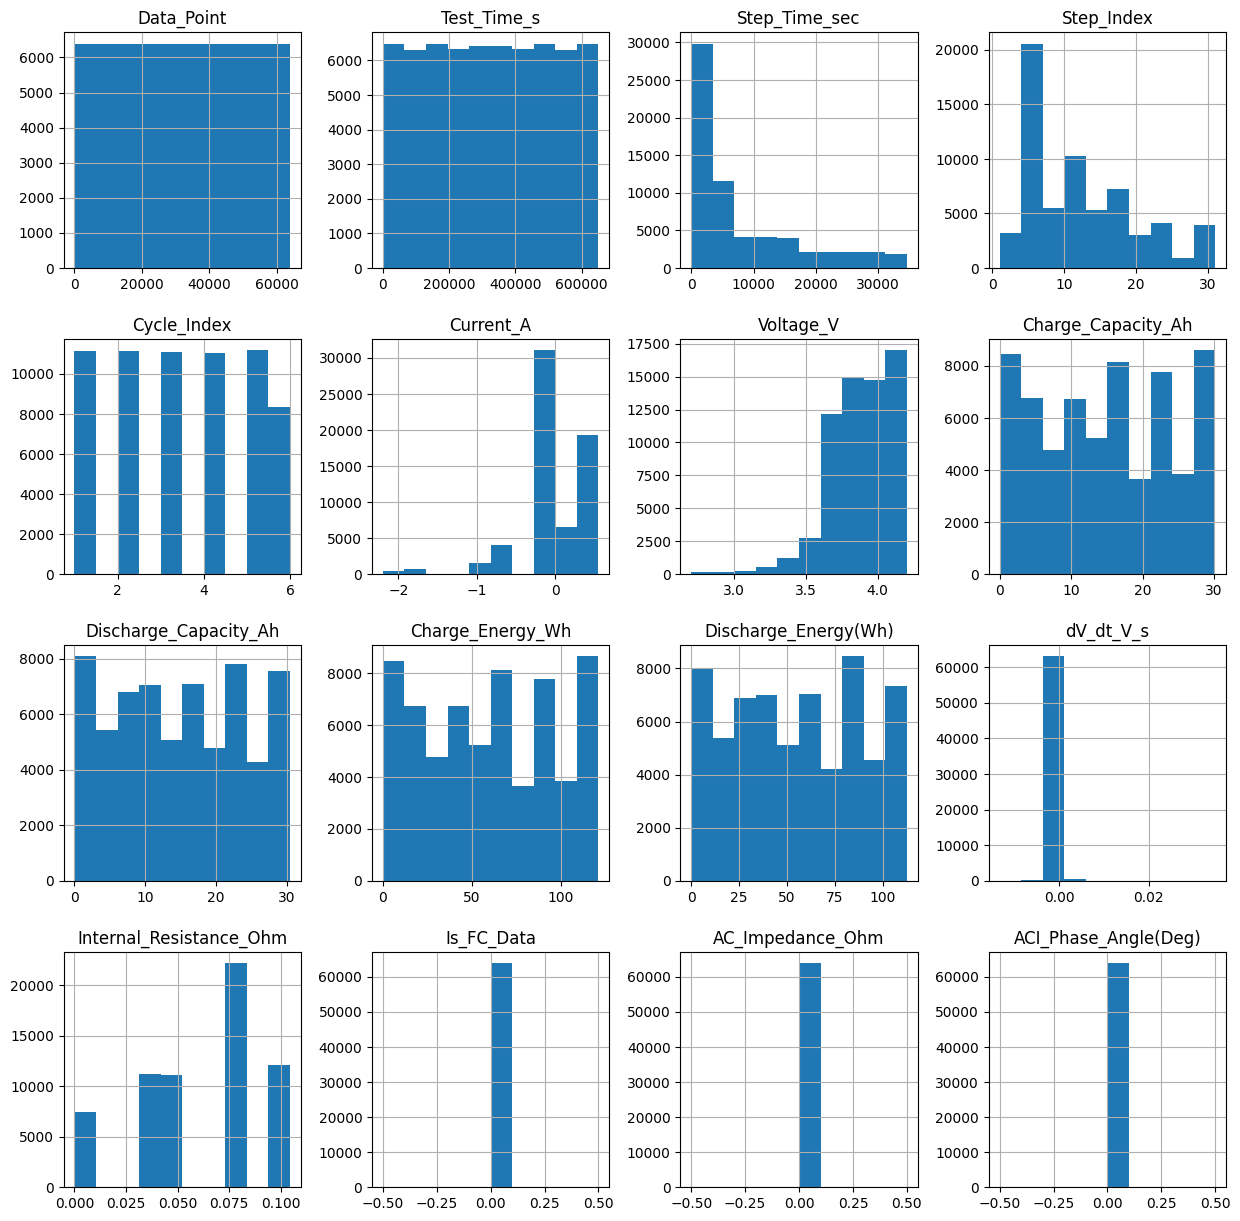

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,15]
data.hist();

In [12]:
num_col = list(data.describe().columns)
col_categorical = list(set(data.columns).difference(num_col))
remove_list = ['Date_Time','Data_Point','Step_Time(s)','Step_Index','Cycle_Index']
col_numerical = [ e for e in num_col if e not in remove_list]

In [13]:
categorical_col = []
for k, v in data.items():
    if v.dtype =='object':
        categorical_col.append(k)

print(categorical_col)

['Date_Time']


In [14]:
print(len(num_col))
print(len(col_numerical))
print(len(col_categorical))

16
13
1


In [15]:
data[col_numerical].corr()

,Test_Time_s,Step_Time_sec,Current_A,Voltage_V,Charge_Capacity_Ah,Discharge_Capacity_Ah,Charge_Energy_Wh,Discharge_Energy(Wh),dV_dt_V_s,Internal_Resistance_Ohm,Is_FC_Data,AC_Impedance_Ohm,ACI_Phase_Angle(Deg)
Test_Time_s,1.000000,-0.030673,-0.005867,-0.020406,0.998419,0.999130,0.998412,0.999213,-0.001065,0.231293,NaN,NaN,NaN
Step_Time_sec,-0.030673,1.000000,-0.170092,-0.492491,-0.046870,-0.027937,-0.046289,-0.028359,-0.085196,0.202299,NaN,NaN,NaN
Current_A,-0.005867,-0.170092,1.000000,0.480009,-0.005678,-0.005240,-0.006070,-0.005656,0.227137,-0.021323,NaN,NaN,NaN
Voltage_V,-0.020406,-0.492491,0.480009,1.000000,0.009254,-0.019116,0.008968,-0.019813,-0.021993,-0.081496,NaN,NaN,NaN
Charge_Capacity_Ah,0.998419,-0.046870,-0.005678,0.009254,1.000000,0.999379,0.999999,0.999346,-0.005535,0.229541,NaN,NaN,NaN
Discharge_Capacity_Ah,0.999130,-0.027937,-0.005240,-0.019116,0.999379,1.000000,0.999382,0.999994,-0.002397,0.232284,NaN,NaN,NaN
Charge_Energy_Wh,0.998412,-0.046289,-0.006070,0.008968,0.999999,0.999382,1.000000,0.999345,-0.005511,0.229771,NaN,NaN,NaN
Discharge_Energy(Wh),0.999213,-0.028359,-0.005656,-0.019813,0.999346,0.999994,0.999345,1.000000,-0.002444,0.231574,NaN,NaN,NaN
dV_dt_V_s,-0.001065,-0.085196,0.227137,-0.021993,-0.005535,-0.002397,-0.005511,-0.002444,1.000000,0.018011,NaN,NaN,NaN
Internal_Resistance_Ohm,0.231293,0.202299,-0.021323,-0.081496,0.229541,0.232284,0.229771,0.231574,0.018011,1.000000,NaN,NaN,NaN


#<font color = red> Confusion Matrix

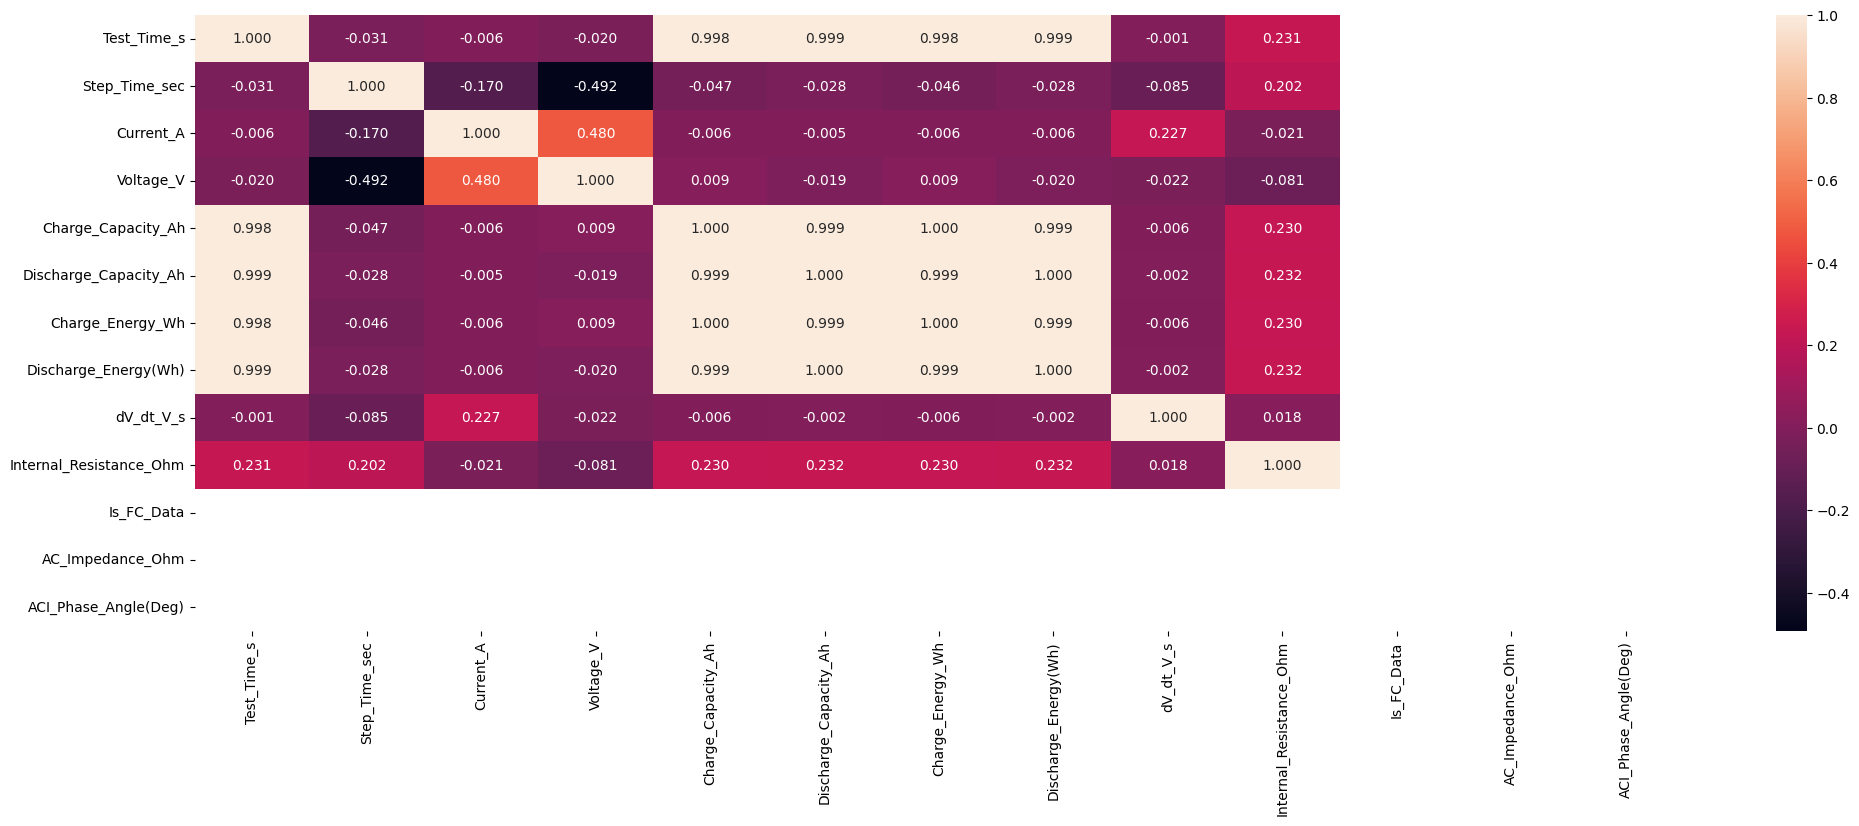

In [16]:
plt.figure(figsize =(24,8))
sns.heatmap(data[col_numerical].corr(),annot = True,fmt = ".3f");

#<font color =red>  Showing (masking) half of the heatmap

The half of the heatmap is remove because it a mirror of data representation.

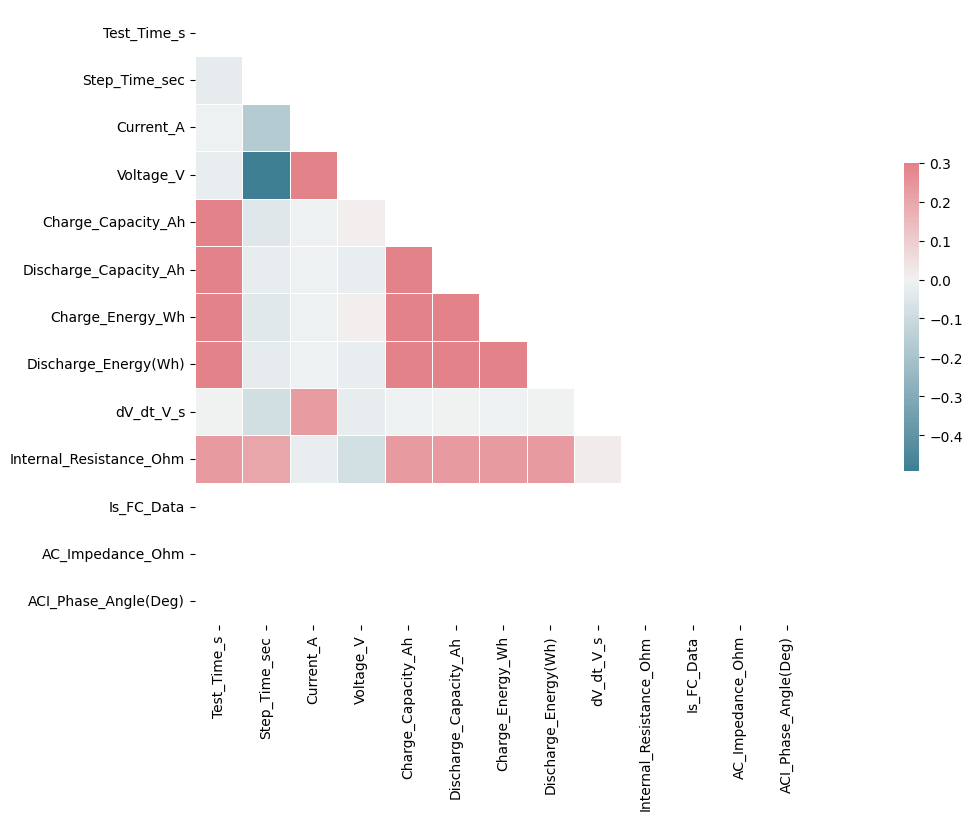

In [17]:
import numpy as np
plt.figure(figsize=(24,8))
#  mask for the upper triangle
mask = np.zeros_like(data[col_numerical].corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
# generate a custom diverging colormap

cmap = sns.diverging_palette(220,10,as_cmap=True)

# heatmap with mask and correct aspect ratio
sns.heatmap(data[col_numerical].corr(),mask = mask, cmap = cmap, vmax = .3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5});

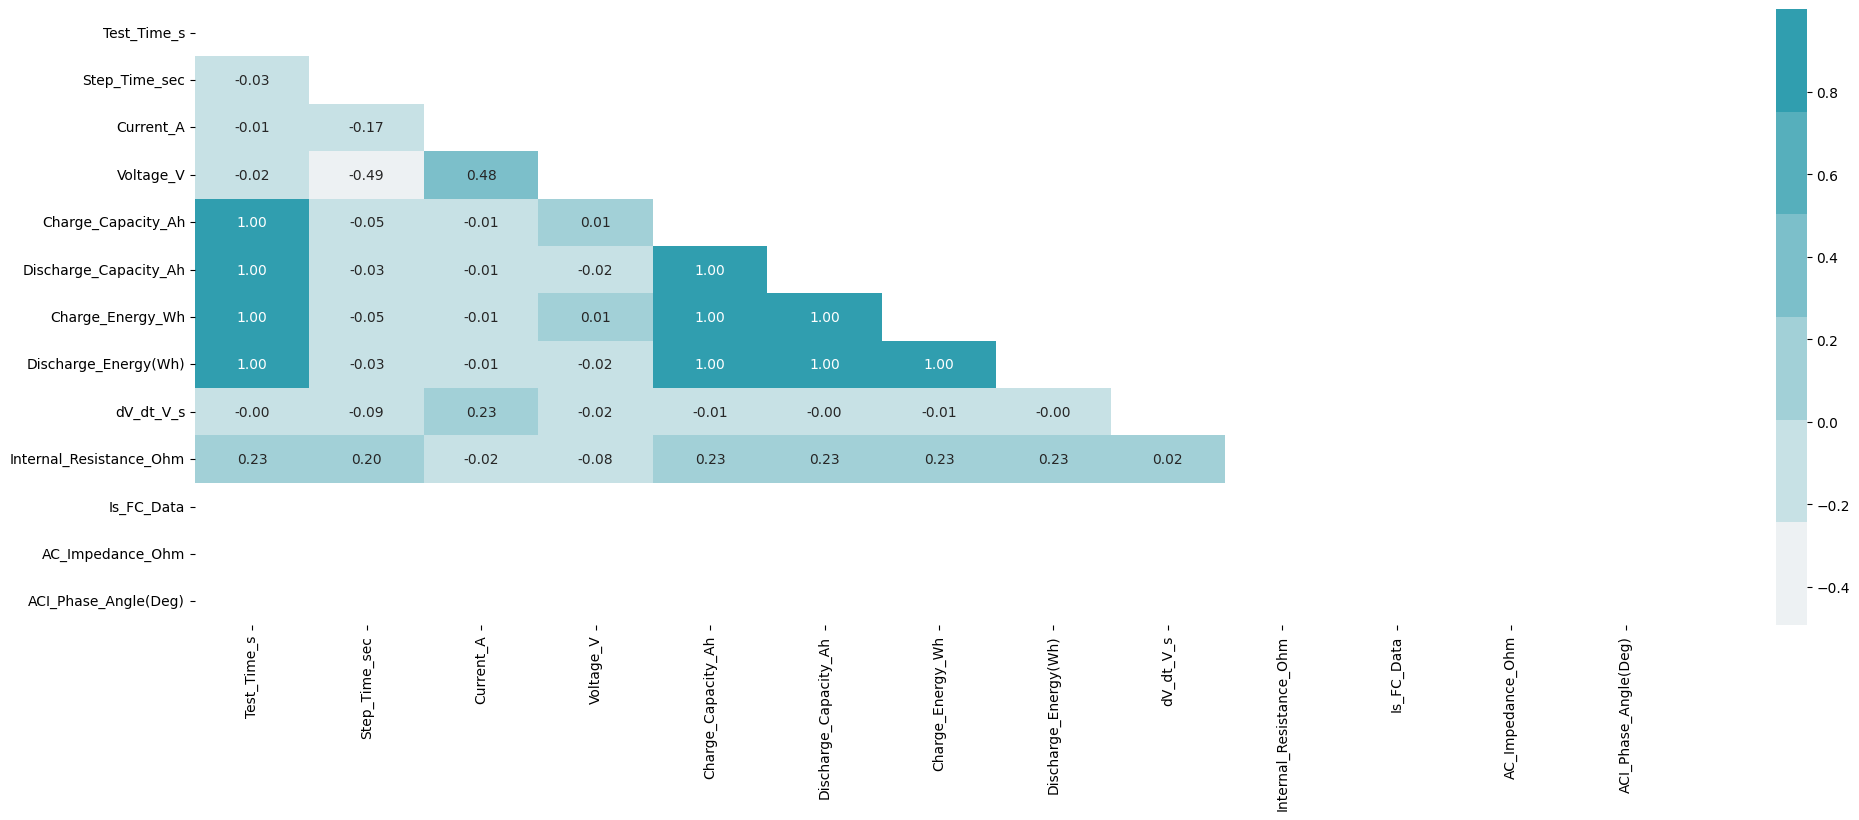

In [18]:
plt.figure(figsize=(24,8))
#  mask for the upper triangle
mask = np.zeros_like(data[col_numerical].corr(), dtype=bool)
mask[np.triu_indices_from(mask)]=True
# generate a custom diverging colormap

cmap = sns.light_palette((210,90,60), input = 'husl')

# heatmap with mask and correct aspect ratio
sns.heatmap(data[col_numerical].corr(),mask = mask, cmap = cmap, annot = True, fmt = ".2f");

In [19]:
#x = pd.concat(data[col_numerical],data[col_categorical],axis =1)
#x.head()

#<font color=red> Checking if there are any duplicate values present in the dataset or not ?

In [20]:
data.duplicated().sum()

0

In [53]:
def plot_test_data(data, profile="charge"):

    if profile=='charge':

        plt.figure(figsize=(15,8))
        plt.plot(data.Test_Time_s, data.Voltage_V, 'b', label='Voltage_V')
        plt.plot(data.Test_Time_s, data.Current_A, 'r', label='Current_A')
        plt.title("Plot of Test time vrs. voltage and current")
        plt.xlabel("Test time(s)")
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,8))
        plt.plot(data.Test_Time_s, data.Charge_Capacity_Ah, 'k', label='Charge_Capacity_Ah')
        plt.ylabel("Charge_Capacity_Ah")
        plt.xlabel("Test time(s)")
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,8))
        plt.plot(data.Test_Time_s, data.Discharge_Capacity_Ah, 'b', label='Discharge_Capacity_Ah')
        plt.xlabel("Test time(s)")
        plt.ylabel("Discharge_Capacity_Ah")
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,8))
        plt.plot(data.Test_Time_s, data.Internal_Resistance_Ohm, 'g', label='Internal_Resistance_Ohm')
        plt.xlabel("Test time(s)")
        plt.ylabel("Internal_Resistance_Ohm")
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,8))
        plt.plot(data.Test_Time_s, data.dV_dt_V_s, 'g', label='dV_dt_V_s')
        plt.xlabel("Test time(s)")
        plt.ylabel("IdV_dt_V_s")
        plt.legend()
        plt.show()
    elif profile=='discharge':
        plt.figure(figsize=(15,8))
        plt.plot(data.Test_Time_s, data.Discharge_Capacity_Ah, 'b', label='Discharge_Capacity_Ah')
        plt.plot(data.Test_Time_s, data.Step_Time_sec, 'r', label='Step_Time_sec')
        plt.legend()
        plt.show()

        # plt.figure(figsize=(15,8))
        # plt.plot(data.Test_Time_s, data.Voltage_V, 'b', label='Voltage_V')
        # plt.plot(data.Test_Time_s, data.Current_A, 'r', label='Current_A')
        # plt.legend()
        # plt.show()

        plt.figure(figsize=(15,8))
        plt.plot(data.Test_Time_s, data.Charge_Capacity_Ah, 'k', label='Charge_Capacity_Ah')
        plt.legend()
        plt.title("Plot of data")
        plt.show()
    elif profile=='Internal_Resistance_Ohm':
        pass
    else:
        print('No cycle recognized')

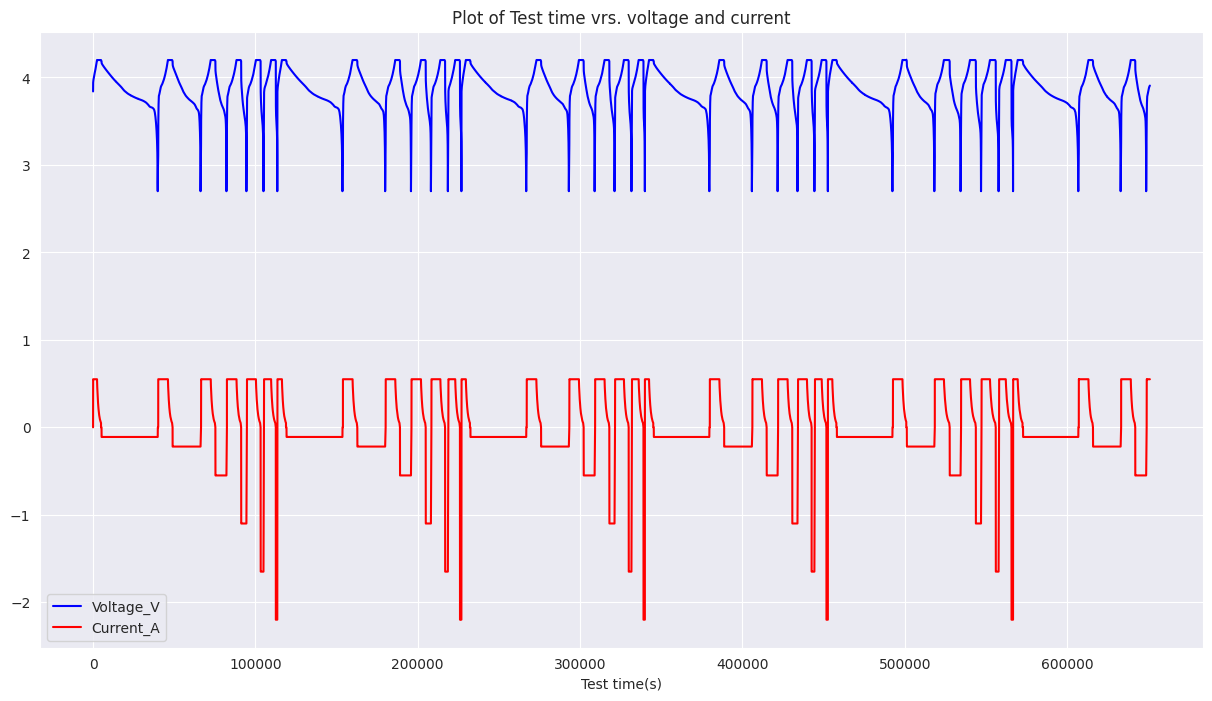

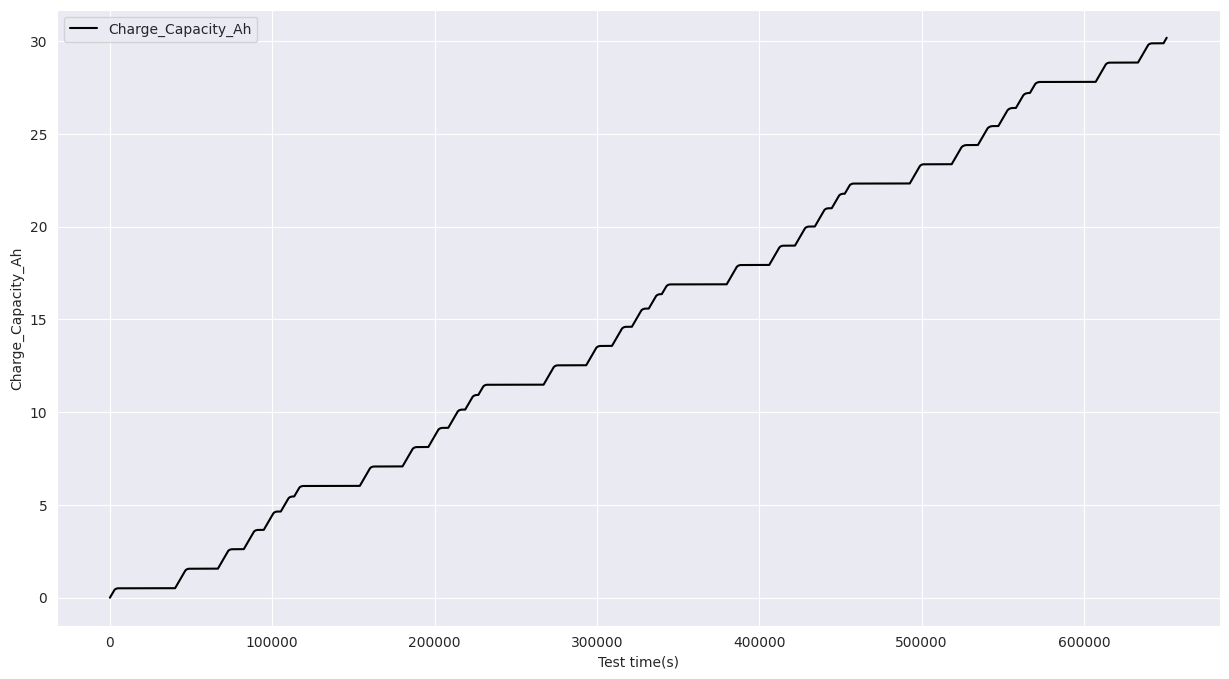

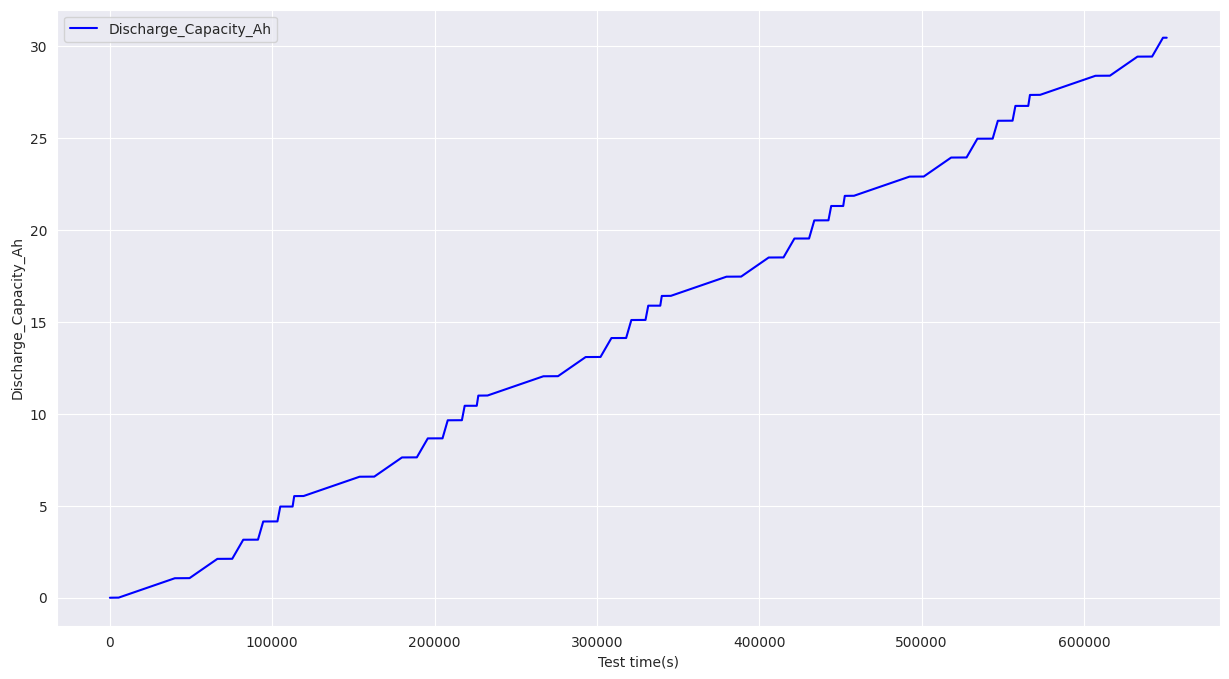

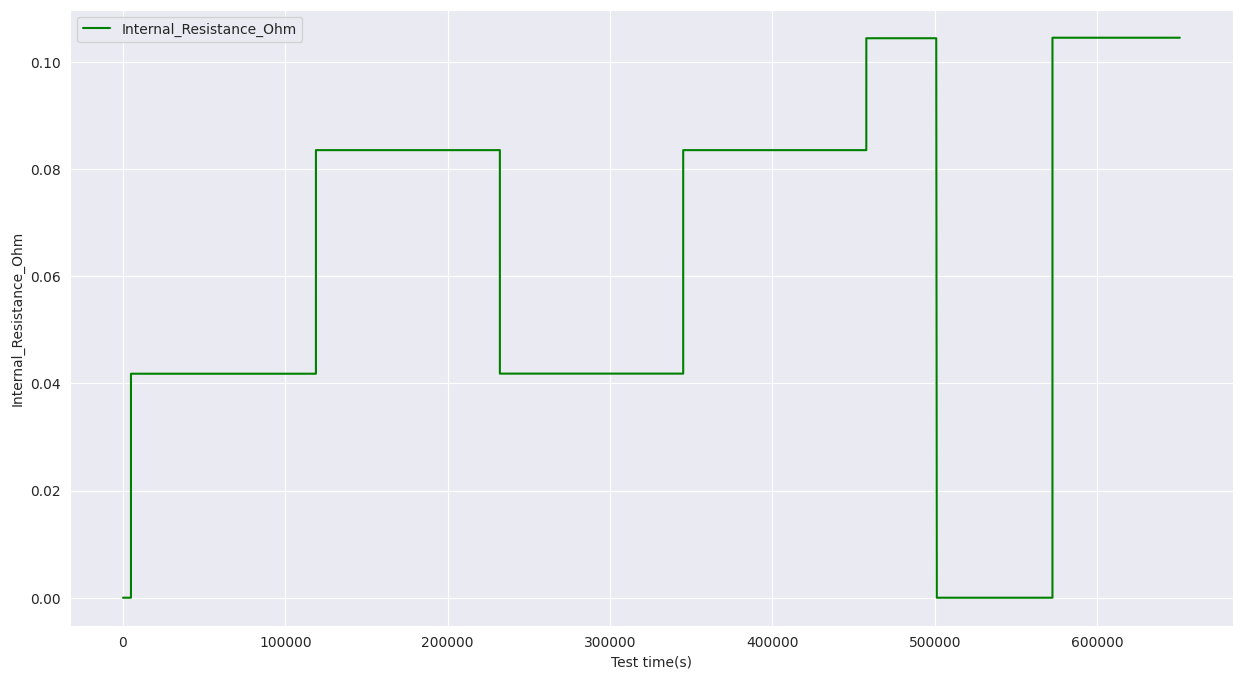

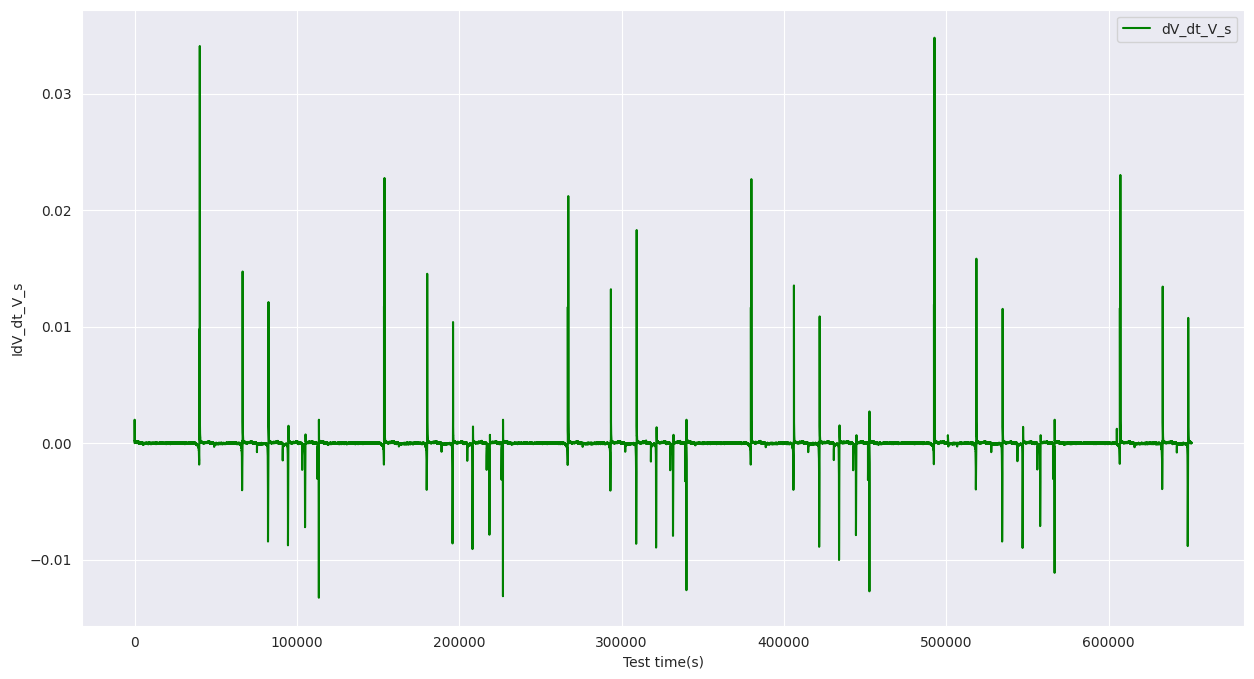

In [54]:
plot_test_data(data)